In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Содержание ноутбука**
* Ввод начальных данных
* Загрузка данных эксперимента
* Предварительная обработка данных
* Вычисление АДХ

### Ввод начальных данных

In [2]:
# Начальные данные
speed_inf = 25  # Скорость набегающего потока, м/с
alfa = 30  # Угол атаки, град
density = 1.2754  # Плотность воздуха, кг/м3
q = density * speed_inf ** 2 / 2  # Скоростной напор, кг/(м*с2)
number = 4  # Число циклов измерений
length = 0.5  # Характерная длина, м
d = 0.176  # Диаметр миделя ЛА, м
s_xar = np.pi * d ** 2 / 4  # Характерная площадь
taring_coefs = {'x': -10.4661,
                'y': -2,
                'z': 1.35,
                'My': -135,
                'Mz': -766}
taring_x = -10.4661  # Средний тарировочный коэффициент по каналу X
taring_y = -2  # Средний тарировочный коэффициент по каналу Y
taring_z = 1.35  # Средний тарировочный коэффициент по каналу Z
taring_my = -135  # Средний тарировочный коэффициент по каналу My
taring_mz = -766  # Средний тарировочный коэффициент по каналу Mz
all_experiment = {0: [240, 300],
                  2900: [530, 590],
                  4050: [760, 820],
                  6900: [1060, 1120],
                  10200: [1350, 1420]}  # Словарь, где ключ - значение пременной изменяемой при каждом цикле,
                     # значение - список, содержащий моменты начала и конца каждого цикла
values_variable = [0, 2900, 4050, 6900, 10200]  # Список, хранящий значения переменной, изменяющейся в каждом цикле
name_variable = 'Скорость вращения, рад/с'  # Название переменной, которая изменяется в каждом цикле эксперимента

### Загрузка данных эксперимента

In [3]:
# Список каналов
channels = ['time', 'x', 'y', 'z', 'Mx', 'My', 'Mz']

In [4]:
# Загружаем данные эксперимента в датафрейм data
data = pd.read_excel(r'Experiment2.xlsx')
data.columns = channels
data

,time,x,y,z,Mx,My,Mz
0,0.005,-0.003,-0.001,-0.001,0.000,-0.003,0.000
1,0.010,-0.004,-0.001,-0.002,0.000,-0.005,0.000
2,0.015,-0.004,-0.001,-0.002,0.000,-0.004,0.000
3,0.020,-0.005,-0.001,-0.001,0.000,-0.002,0.000
4,0.025,-0.002,-0.001,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
311544,1557.725,-0.389,-0.086,0.005,0.019,0.098,0.094
311545,1557.730,-0.387,-0.085,0.005,0.019,0.098,0.094
311546,1557.735,-0.385,-0.084,0.004,0.019,0.097,0.094
311547,1557.740,-0.385,-0.084,0.003,0.019,0.094,0.094


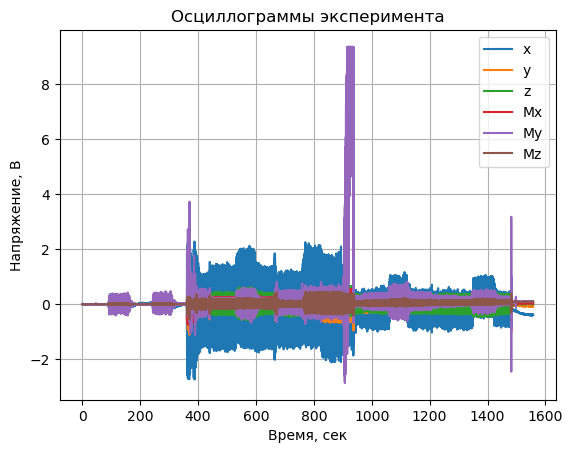

In [5]:
# Визулизация осциллограмм эксперимента
for i in range(1, len(channels)):
    plt.plot(data['time'], data[channels[i]])
plt.grid()
plt.title('Осциллограммы эксперимента')
plt.legend(channels[1:])
plt.xlabel('Время, сек')
plt.ylabel('Напряжение, В')
plt.show()

### Предварительная обработка данных

In [6]:
class Experiment:
    def __init__(self, data):
        self.data = data
    
    def filter(self, channel):
        index_to_del = []
        parts = 500
        for i in range(len(self.data.index) // parts):
            Q1 = self.data.loc[i * parts:(i + 1) * parts - 1, channel].quantile(q=0.45)
            Q3 = self.data.loc[i * parts:(i + 1) * parts - 1, channel].quantile(q=0.55)
            IQR = Q3 - Q1
    
            for j in range(i * parts, (i + 1) * parts):
                if (self.data.loc[j, channel] > Q3) or (self.data.loc[j, channel] < Q1):
                    index_to_del.append(j)

        filtered_data = self.data.drop(index=index_to_del)
        return filtered_data
    
def n_filter(data, n, channel):
    new_data = Experiment(data)
    for _ in range(n):
        current_data = new_data.filter(channel)
        current_data.index = range(0, current_data.shape[0])
        new_data = Experiment(current_data)
    return new_data.data

In [7]:
exp1 = Experiment(data)

Обработаем сигналы по каждому из каналов по отдельности

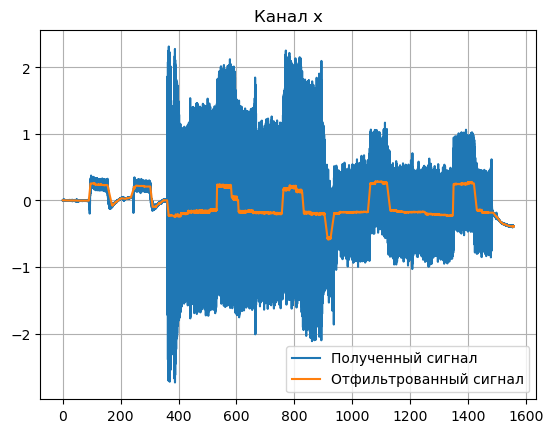

In [8]:
plt.plot(exp1.data['time'], exp1.data['x'])
new_data = n_filter(exp1.data, 2, 'x')
plt.plot(new_data['time'], new_data['x'])
plt.title('Канал x')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

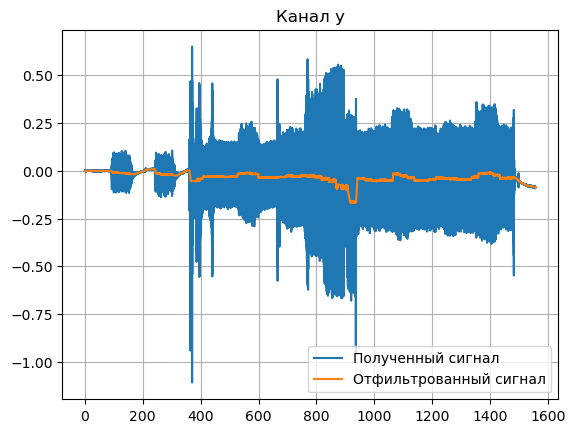

In [9]:
plt.plot(exp1.data['time'], exp1.data['y'])
new_data = n_filter(exp1.data, 2, 'y')
plt.plot(new_data['time'], new_data['y'])
plt.title('Канал y')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

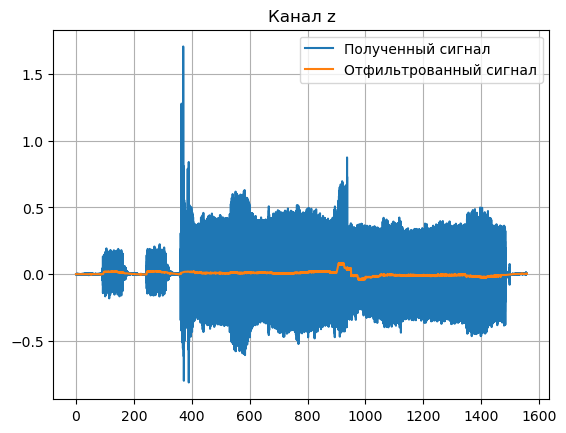

In [10]:
plt.plot(exp1.data['time'], exp1.data['z'])
new_data = n_filter(exp1.data, 2, 'z')
plt.plot(new_data['time'], new_data['z'])
plt.title('Канал z')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

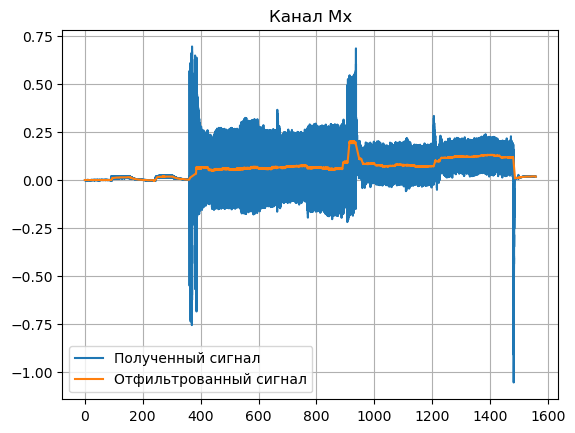

In [11]:
plt.plot(exp1.data['time'], exp1.data['Mx'])
new_data = n_filter(exp1.data, 2, 'Mx')
plt.plot(new_data['time'], new_data['Mx'])
plt.title('Канал Mx')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

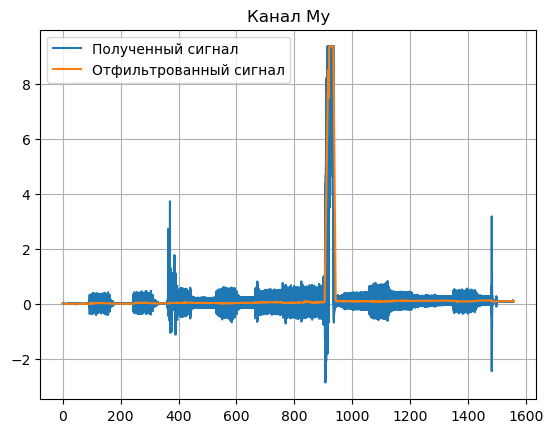

In [12]:
plt.plot(exp1.data['time'], exp1.data['My'])
new_data = n_filter(exp1.data, 2, 'My')
plt.plot(new_data['time'], new_data['My'])
plt.title('Канал My')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

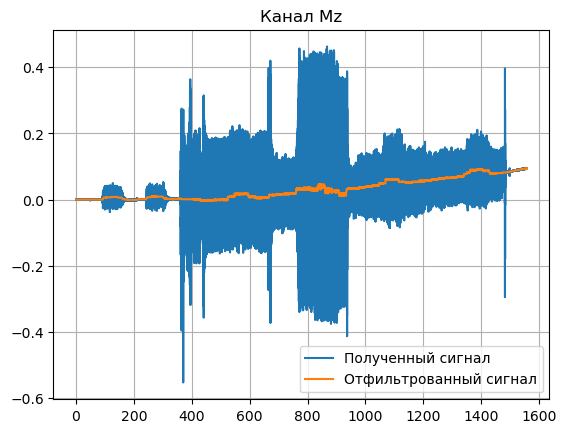

In [13]:
plt.plot(exp1.data['time'], exp1.data['Mz'])
new_data = n_filter(exp1.data, 2, 'Mz')
plt.plot(new_data['time'], new_data['Mz'])
plt.title('Канал Mz')
plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
plt.grid()
plt.show()

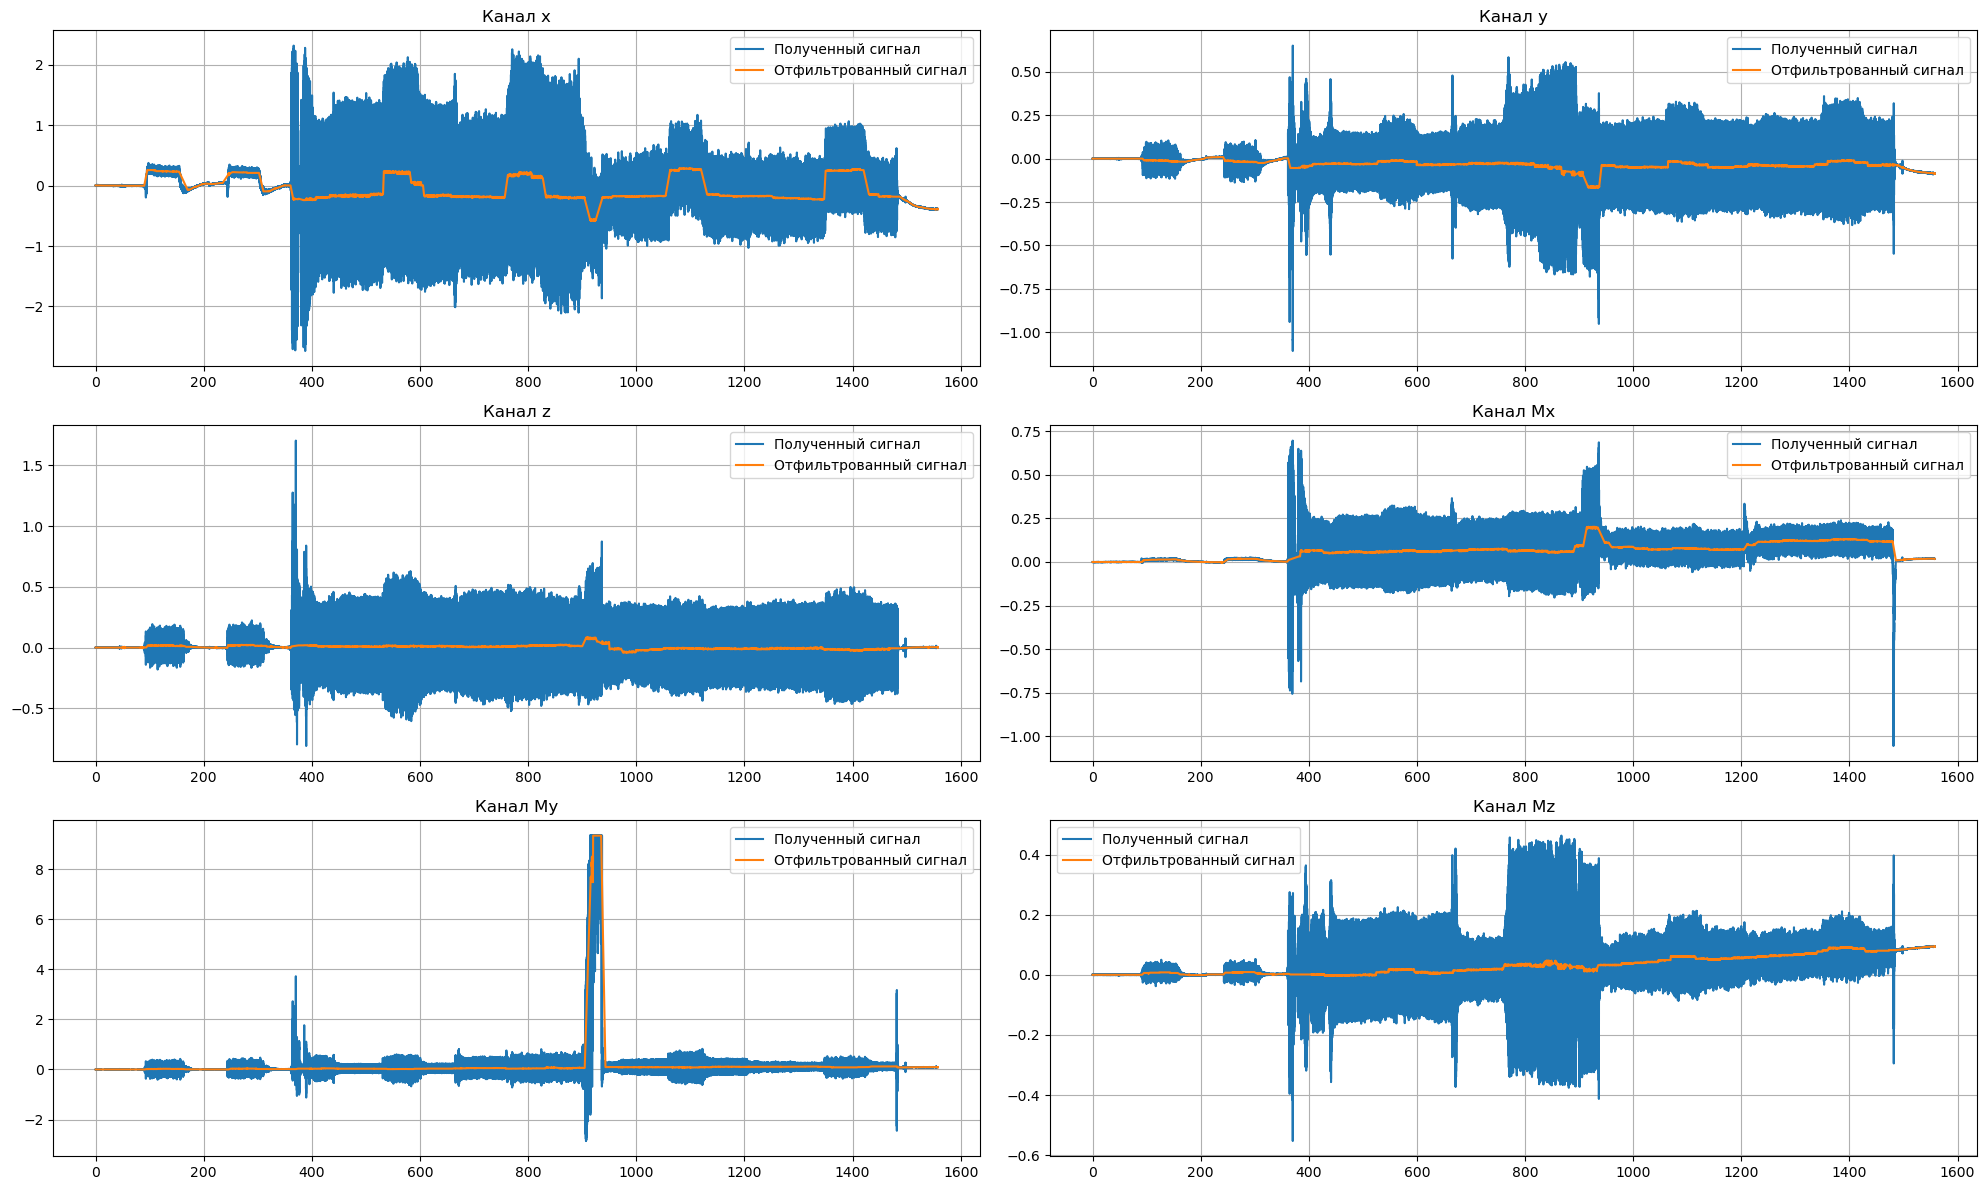

In [14]:
count = 1
plt.figure(figsize=(20, 12))
for i in channels[1:]:
    plt.subplot(3, 2, count)
    plt.plot(exp1.data['time'], exp1.data[i])
    new_data = n_filter(exp1.data, 2, i)
    plt.plot(new_data['time'], new_data[i])
    plt.title(f'Канал {i}')
    plt.legend(['Полученный сигнал', 'Отфильтрованный сигнал'])
    plt.grid()
    count += 1
plt.tight_layout()
plt.show()

### Вычисление АДХ

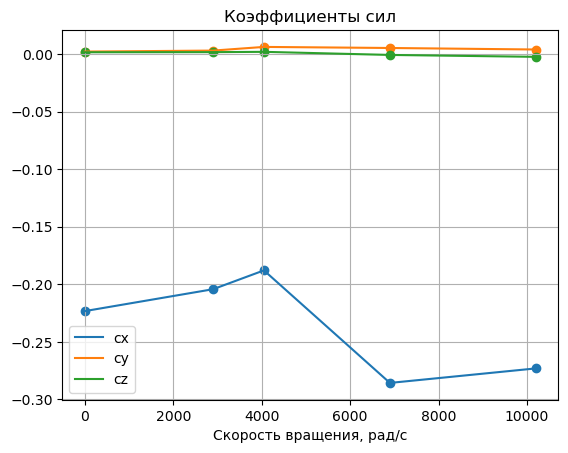

In [15]:
# Вычисление коэффициентов сил
cx = []
cy = []
cz = []

new_data = n_filter(exp1.data, 2, 'x')
for j in all_experiment.keys():
    cx.append(new_data.loc[(new_data['time'] >= all_experiment[j][0])
            & (new_data['time'] <= all_experiment[j][1]), 'x'].mean() * taring_x / (q * s_xar))
    
new_data = n_filter(exp1.data, 2, 'y')
for j in all_experiment.keys():
    cy.append(new_data.loc[(new_data['time'] >= all_experiment[j][0])
            & (new_data['time'] <= all_experiment[j][1]), 'y'].mean() * taring_y / (q * s_xar))  
    
new_data = n_filter(exp1.data, 2, 'z')
for j in all_experiment.keys():
    cz.append(new_data.loc[(new_data['time'] >= all_experiment[j][0])
            & (new_data['time'] <= all_experiment[j][1]), 'z'].mean() * taring_z / (q * s_xar))
    
plt.plot(values_variable, cx)
plt.plot(values_variable, cy)
plt.plot(values_variable, cz)
plt.scatter(values_variable, cx)
plt.scatter(values_variable, cy)   
plt.scatter(values_variable, cz)
plt.title('Коэффициенты сил')
plt.xlabel(name_variable)
plt.legend(['cx', 'cy', 'cz'])
plt.grid()
plt.show()

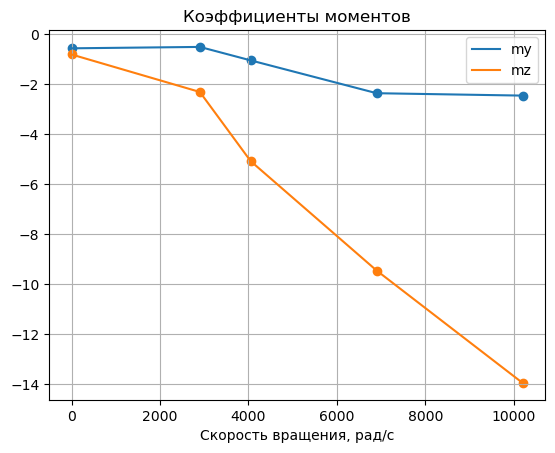

In [16]:
# Вычисление коэффициентов моментов
my = []
mz = []

new_data = n_filter(exp1.data, 2, 'My')
for j in all_experiment.keys():
    my.append(new_data.loc[(new_data['time'] >= all_experiment[j][0])
            & (new_data['time'] <= all_experiment[j][1]), 'My'].mean() * taring_my / (q * s_xar * length))
    
new_data = n_filter(exp1.data, 2, 'Mz')
for j in all_experiment.keys():
    mz.append(new_data.loc[(new_data['time'] >= all_experiment[j][0])
            & (new_data['time'] <= all_experiment[j][1]), 'Mz'].mean() * taring_mz / (q * s_xar * length))  
    
plt.plot(values_variable, my)
plt.plot(values_variable, mz)
plt.scatter(values_variable, my)   
plt.scatter(values_variable, mz)
plt.title('Коэффициенты моментов')
plt.xlabel(name_variable)
plt.legend(['my', 'mz'])
plt.grid()
plt.show()